In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
!pip install bioinfokit
from bioinfokit.analys import stat
from matplotlib_venn import venn3

In [2]:
# Create a data frame with given columns and value

file = os.path.join("heart_disease_health_indicators_BRFSS2015.csv")
ac_original_df = pd.read_csv(file)
ac_original_df.head(20)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,2,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [3]:
##Get the shape of DF
ac_original_df.shape


(253680, 22)

In [4]:
#---------------------inspect whether value in the columns fall within the excpected range-------------------------------#
ac_original_df.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [5]:
## expected value 0 or 1 for the following columns :
## HeartDiseaseorAttack, HighChol, CholCheck, Smoker, Stroke,PhysActivity, Fruits,Veggies
## HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk,Sex,  

## after inspection of number of data above and skimming the first 20 rows, the values in
## above mentioned columns are within expected range
#referred to 2015 BRFSS Codebook and the source's footnote

In [6]:
## data exploration, and, if necessary, clean up for the rest of the columns
##-----------------------------------------BMI-----------------------------------------------------##
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the BMI

ac_BMIsummary_table = ac_original_df.agg({"BMI":["mean","median","var","std","sem"]}).round(decimals=2)
ac_BMIsummary_table



,BMI
mean,28.38
median,27.00
var,43.67
std,6.61
sem,0.01


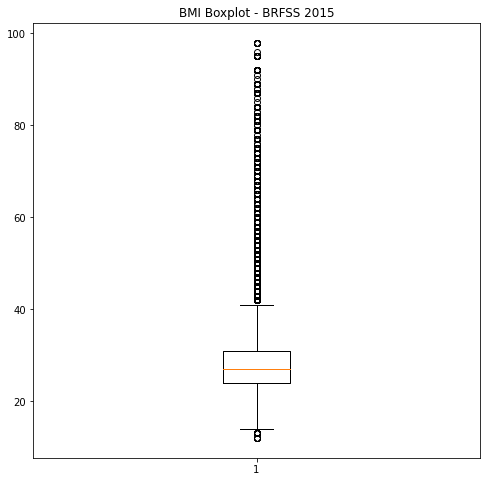

In [7]:


# Generate a box plot of the BMI data 
plt.boxplot(x = ac_original_df["BMI"])
plt.title('BMI Boxplot - BRFSS 2015')
plt.gcf().set_size_inches(8,8)
plt.show()

# Values of the BMI fall within the expected range, therefore the removal of the outliers will not be necessary
# no null values observed

In [8]:
#Getting the value of Coefficient of Variation for the BMI

Co_Var=(ac_BMIsummary_table.iloc[3,0]/ac_BMIsummary_table.iloc[0,0]).round(decimals=2)
Co_Var

#CV yields value <1 showing low variability in the data set

0.23

In [9]:
## Diabetes column, expected value 0, 1 or 2
ac_original_df["Diabetes"].value_counts()

0    213703
2     35346
1      4631
Name: Diabetes, dtype: int64

In [10]:
## MentHlth column, expected value within the range of 0-30
ac_MentHlth = ac_original_df["MentHlth"].value_counts().sort_index()
print(ac_MentHlth)

0     175680
1       8538
2      13054
3       7381
4       3789
5       9030
6        988
7       3100
8        639
9         91
10      6373
11        41
12       398
13        41
14      1167
15      5505
16        88
17        54
18        97
19        16
20      3364
21       227
22        63
23        38
24        33
25      1188
26        45
27        79
28       327
29       158
30     12088
Name: MentHlth, dtype: int64


In [11]:
## PhysHlth  column, expected value within the range of 0-30
ac_PhysHlth = ac_original_df["MentHlth"].value_counts().sort_index()
print(ac_PhysHlth )

0     175680
1       8538
2      13054
3       7381
4       3789
5       9030
6        988
7       3100
8        639
9         91
10      6373
11        41
12       398
13        41
14      1167
15      5505
16        88
17        54
18        97
19        16
20      3364
21       227
22        63
23        38
24        33
25      1188
26        45
27        79
28       327
29       158
30     12088
Name: MentHlth, dtype: int64


In [12]:
## Age  column, expected value within the range of 1-13
ac_age = ac_original_df["Age"].value_counts().sort_index()
print(ac_age )

1      5700
2      7598
3     11123
4     13823
5     16157
6     19819
7     26314
8     30832
9     33244
10    32194
11    23533
12    15980
13    17363
Name: Age, dtype: int64


In [13]:
## Education column, expected value within the range of 1-6
ac_ed = ac_original_df["Education"].value_counts().sort_index()
print(ac_ed )

1       174
2      4043
3      9478
4     62750
5     69910
6    107325
Name: Education, dtype: int64


In [14]:
## Income column, expected value within the range of 1-8
ac_inc = ac_original_df["Income"].value_counts().sort_index()
print(ac_inc )

1     9811
2    11783
3    15994
4    20135
5    25883
6    36470
7    43219
8    90385
Name: Income, dtype: int64


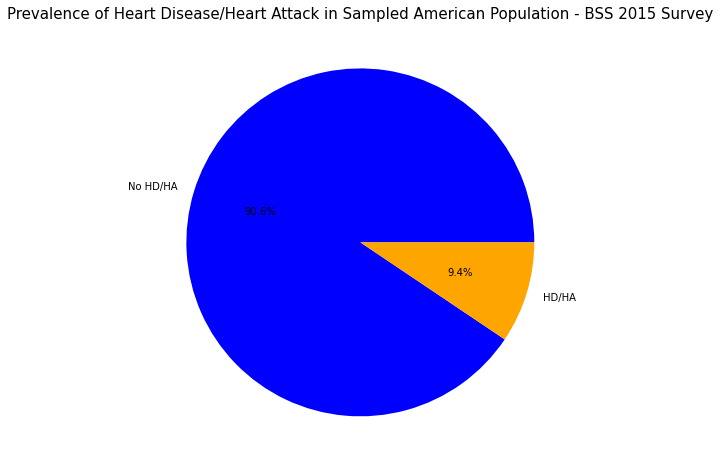

In [15]:
ac_hdha_prev = ac_original_df["HeartDiseaseorAttack"].value_counts()
plt.pie(ac_hdha_prev, labels= ("No HD/HA", "HD/HA"), colors= ["blue", "orange"]
        , autopct="%1.1f%%", startangle=0)
plt.gcf().set_size_inches(8,8)
plt.title('Prevalence of Heart Disease/Heart Attack in Sampled American Population - BSS 2015 Survey', fontsize=15)
plt.show()

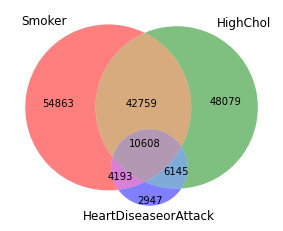

In [16]:
## we are interested in exploring the overlap among sampled population with HD/HA, smoking, high Cholesterol, Diabetes
## in people who have already HA/HD


ac_venn_int1= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1) & (ac_original_df["Smoker"] == 1)& (ac_original_df["HeartDiseaseorAttack"] == 1)])
ac_venn_int2= len(ac_original_df.loc[(ac_original_df["Smoker"] == 1)& (ac_original_df["HeartDiseaseorAttack"] == 1)])-ac_venn_int1
ac_venn_int3= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1)& (ac_original_df["HeartDiseaseorAttack"] == 1)])-ac_venn_int1
ac_venn4= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1)& (ac_original_df["Smoker"] == 1)])-ac_venn_int1
ac_venn5= len(ac_original_df.loc[(ac_original_df["HeartDiseaseorAttack"] == 1) & (ac_original_df["Smoker"] != 1)& (ac_original_df["HighChol"] != 1)])
ac_venn6= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1) & (ac_original_df["Smoker"] != 1)& (ac_original_df["HeartDiseaseorAttack"] != 1)])
ac_venn7= len(ac_original_df.loc[(ac_original_df["Smoker"] == 1) & (ac_original_df["HighChol"] != 1)& (ac_original_df["HeartDiseaseorAttack"] != 1)])

venn3(subsets = (ac_venn7, ac_venn6, ac_venn4, ac_venn5, ac_venn_int2, ac_venn_int3, ac_venn_int1), set_labels = ('Smoker', 'HighChol', 'HeartDiseaseorAttack'), alpha = 0.5)

In [17]:
ac_hdha_prev

0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64

In [18]:
print(str(10608+4193+2947+6145))

23893


In [19]:
income_mapping = pd.DataFrame({"Income":[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],
                               "IncomeBracket": ["10,000 less","10,000-24,999","25,000-34,999","35,000-44,999","45,000-54,999","55,000-64,999","65,000-74,999","75000 or more"]})
income_mapping


,Income,IncomeBracket
0,1.0,"10,000 less"
1,2.0,"10,000-24,999"
2,3.0,"25,000-34,999"
3,4.0,"35,000-44,999"
4,5.0,"45,000-54,999"
5,6.0,"55,000-64,999"
6,7.0,"65,000-74,999"
7,8.0,75000 or more


In [20]:
heart_attack_mapping = pd.DataFrame({"HeartDiseaseorAttack":[0,1],
                                    "HeartDisease": ["No heart disease", "Had heart disease or attack"]})
sex_mapping = pd.DataFrame({"Sex":[0,1],
                            "Gender":["Female", "Male"]})
age_mapping = pd.DataFrame({"Age":[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0],
            "AgeBracket": ["18 to 24","25 to 29","30 to 34","35 to 39","40 to 44","45 to 49","50 to 54","55 to 59","60 to 64","65 to 69","70 to 74","75 to 79","80 or older"]})
healthcare_mapping = pd.DataFrame({"AnyHealthcare": [0,1],
                                 "HealthCare":["No health care access", "With health insurance"]})

In [21]:
mapped_df = pd.merge(ac_original_df, heart_attack_mapping, on= "HeartDiseaseorAttack" )
mapped_df = pd.merge(mapped_df, income_mapping, on="Income")
mapped_df = pd.merge(mapped_df, sex_mapping, on="Sex")
mapped_df = pd.merge(mapped_df, age_mapping, on="Age")
mapped_df = pd.merge(mapped_df, healthcare_mapping, on="AnyHealthcare")
mapped_df.tail(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,DiffWalk,Sex,Age,Education,Income,HeartDisease,IncomeBracket,Gender,AgeBracket,HealthCare
253678,0,0,0,1,22,0,0,0,1,0,...,0,1,1,6,5,No heart disease,"45,000-54,999",Male,18 to 24,No health care access
253679,0,0,0,1,20,0,0,0,1,0,...,0,1,1,5,5,No heart disease,"45,000-54,999",Male,18 to 24,No health care access


In [22]:
income_analysis_df = mapped_df[["HeartDiseaseorAttack","HeartDisease",
                                "Income","IncomeBracket",
                                "AnyHealthcare","HealthCare",
                                "Age","AgeBracket",
                                "Sex","Gender"]]
income_analysis_df.head()

,HeartDiseaseorAttack,HeartDisease,Income,IncomeBracket,AnyHealthcare,HealthCare,Age,AgeBracket,Sex,Gender
0,0,No heart disease,3,"25,000-34,999",1,With health insurance,9,60 to 64,0,Female
1,0,No heart disease,3,"25,000-34,999",1,With health insurance,9,60 to 64,0,Female
2,0,No heart disease,3,"25,000-34,999",1,With health insurance,9,60 to 64,0,Female
3,0,No heart disease,3,"25,000-34,999",1,With health insurance,9,60 to 64,0,Female
4,0,No heart disease,3,"25,000-34,999",1,With health insurance,9,60 to 64,0,Female


In [23]:
WithHeartAttack_group = income_analysis_df.loc[income_analysis_df["HeartDiseaseorAttack"] == 1.0]

len(WithHeartAttack_group)

23893

In [24]:
NoHeartAttack_group = income_analysis_df.loc[income_analysis_df["HeartDiseaseorAttack"] == 0.0]

len(NoHeartAttack_group)

229787

In [25]:
data1 = (WithHeartAttack_group.groupby("IncomeBracket")
        .agg({'HeartDiseaseorAttack': 'count'})
        .rename(columns={"HeartDiseaseorAttack":"Had heart disease or attack"})
        .sort_values(["IncomeBracket"], ascending=True))

data1

,Had heart disease or attack
IncomeBracket,
"10,000 less",1553
"10,000-24,999",2197
"25,000-34,999",2519
"35,000-44,999",2828
"45,000-54,999",3161
"55,000-64,999",3646
"65,000-74,999",3404
75000 or more,4585


In [26]:
data2 = (NoHeartAttack_group.groupby("IncomeBracket")
        .agg({'HeartDiseaseorAttack': 'count'})
         .rename(columns={"HeartDiseaseorAttack":"No heart disease"})
        .sort_values(["IncomeBracket"], ascending=True))

data2

,No heart disease
IncomeBracket,
"10,000 less",8258
"10,000-24,999",9586
"25,000-34,999",13475
"35,000-44,999",17307
"45,000-54,999",22722
"55,000-64,999",32824
"65,000-74,999",39815
75000 or more,85800


In [27]:
final_df = pd.merge(data1, data2, on="IncomeBracket")
final_df["Total per IncomeBracket"]= final_df["Had heart disease or attack"] + final_df["No heart disease"]

final_df["Percent of With Heart Disease"] = ((final_df["Had heart disease or attack"] / final_df["Total per IncomeBracket"])*100).map("{:.0f}".format)
final_df["Percent of No Heart Disease"] = ((final_df["No heart disease"] / final_df["Total per IncomeBracket"])*100).map("{:.0f}".format)
final_df

,Had heart disease or attack,No heart disease,Total per IncomeBracket,Percent of With Heart Disease,Percent of No Heart Disease
IncomeBracket,,,,,
"10,000 less",1553,8258,9811,16,84
"10,000-24,999",2197,9586,11783,19,81
"25,000-34,999",2519,13475,15994,16,84
"35,000-44,999",2828,17307,20135,14,86
"45,000-54,999",3161,22722,25883,12,88
"55,000-64,999",3646,32824,36470,10,90
"65,000-74,999",3404,39815,43219,8,92
75000 or more,4585,85800,90385,5,95


In [28]:
income_brackets = [income for income in income_mapping["IncomeBracket"]]
income_codes=[code for code in income_mapping["Income"]]
percent_heart_disease = [int(percent) for percent in final_df["Percent of With Heart Disease"]]
percent_no_heart_disease = [int(percent) for percent in final_df["Percent of No Heart Disease"]]


In [29]:
healthcare_df = (income_analysis_df.groupby(["IncomeBracket","HealthCare"])
        .agg({'HeartDiseaseorAttack': 'count'})

        .sort_values(["IncomeBracket"], ascending=True))

healthcare_df

HeartDiseaseorAttack
IncomeBracket HealthCare                                 
10,000 less   No health care access                  1320
              With health insurance                  8491
10,000-24,999 No health care access                  1061
              With health insurance                 10722
25,000-34,999 No health care access                  1667
              With health insurance                 14327
35,000-44,999 No health care access                  1901
              With health insurance                 18234
45,000-54,999 No health care access                  1784
              With health insurance                 24099
55,000-64,999 No health care access                  1899
              With health insurance                 34571
65,000-74,999 No health care access                  1381
              With health insurance                 41838
75000 or more No health care access                  1404
              With health insurance                 88981

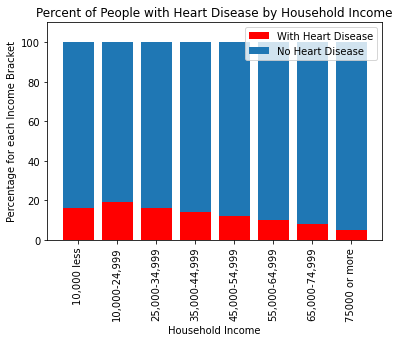

In [30]:
loc = np.arange(8)

bar1 = plt.bar(loc,percent_heart_disease, color="red", width=.8, label="With Heart Disease")
bar2 = plt.bar(loc,percent_no_heart_disease, bottom=percent_heart_disease, width=.8, label="No Heart Disease")

plt.title("Percent of People with Heart Disease by Household Income")
plt.xlabel("Household Income")
plt.ylabel("Percentage for each Income Bracket")
plt.ylim(0,110)
plt.legend()

plt.xticks(loc,(income_brackets), rotation ="vertical")


plt.show()

['HeartDiseaseorAttack', 'Education']
HeartDiseaseorAttack       0      1     All
Education                                  
1                        145     29     174
2                       3265    778    4043
3                       7860   1618    9478
4                      55283   7467   62750
5                      62992   6918   69910
6                     100242   7083  107325
All                   229787  23893  253680
(2589.7898491235974, 0.0, 10)


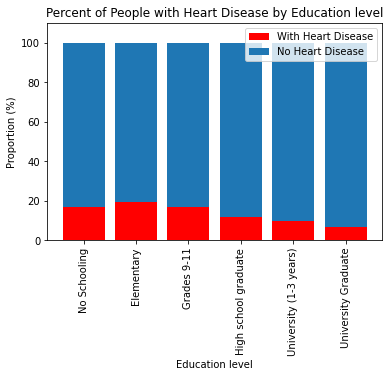

In [31]:
##############EDUCATION section
original_df = pd.read_csv(file)
categorical_col = ['HeartDiseaseorAttack','Education']
print(categorical_col)
chisqt = pd.crosstab(original_df["Education"],original_df["HeartDiseaseorAttack"], margins=True)
print(chisqt)
from scipy.stats import chi2_contingency



chisqt = pd.crosstab(original_df["Education"],original_df["HeartDiseaseorAttack"], margins=True)
value = np.array([chisqt.iloc[0][0:].values,
                  chisqt.iloc[1][0:].values,
                 chisqt.iloc[2][0:].values,
                 chisqt.iloc[3][0:].values,
                 chisqt.iloc[4][0:].values,
                 chisqt.iloc[5][0:].values])

print(chi2_contingency(value)[0:3])


# Therefore the p value is below the 0.05 threshold, Thus, these variables are not independent

## visualisation
#print(chisqt.iloc[0:6][0].values+chisqt.iloc[0:6][1].values)
percent_heart_disease =  (chisqt.iloc[0:6][1].values/(chisqt.iloc[0:6][0].values+chisqt.iloc[0:6][1].values))*100
percent_no_heart_disease = (chisqt.iloc[0:6][0].values/(chisqt.iloc[0:6][0].values+chisqt.iloc[0:6][1].values))*100
loc = np.arange(6)

bar1 = plt.bar(loc,percent_heart_disease, color="red", width=.8, label="With Heart Disease")
bar2 = plt.bar(loc,percent_no_heart_disease, bottom=percent_heart_disease, width=.8, label="No Heart Disease")

plt.title("Percent of People with Heart Disease by Education level")
plt.xlabel("Education level")
plt.ylabel("Proportion (%)")
plt.ylim(0,110)
plt.xticks(loc,["No Schooling","Elementary","Grades 9-11","High school graduate","University (1-3 years)","University Graduate"], rotation = 'vertical')
plt.legend()
plt.savefig("Educcation_HAHD_proportions.png")


plt.show()


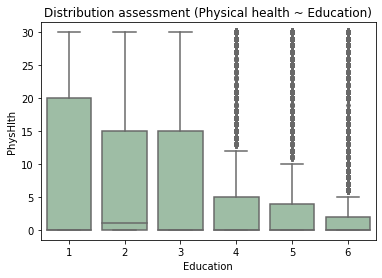

Text(0, 0.5, 'Pysical health (bad/30days)')

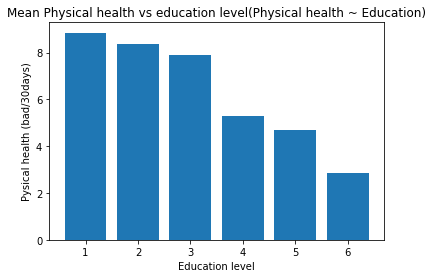

In [32]:
#########Distribution 
import seaborn as sns

ax = sns.boxplot(x='Education', y='PhysHlth', data=original_df, color='#99c2a2')
#ax = sns.swarmplot(x="Education", y="PhysHlth", data=original_df, color='#7d0013')
plt.title("Distribution assessment (Physical health ~ Education)")
plt.show()


########### Means
Grouped_education= original_df.groupby("Education")
means_Grouped_education = Grouped_education.mean()
education_levels = list(means_Grouped_education.index.values)



plt.bar(education_levels, means_Grouped_education["PhysHlth"])

plt.title("Mean Physical health vs education level(Physical health ~ Education)")
plt.xlabel("Education level")
plt.ylabel("Pysical health (bad/30days)")

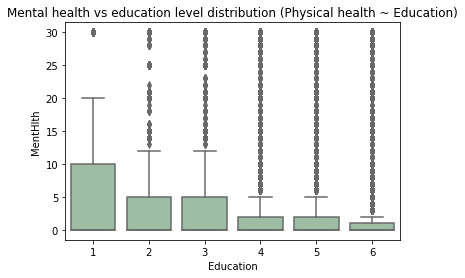

Text(0, 0.5, 'Mental health (bad/30days)')

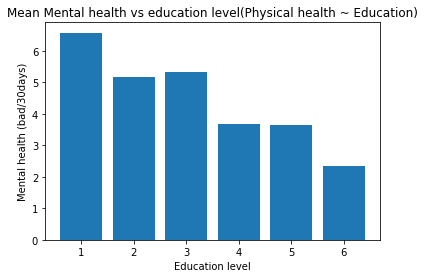

In [33]:
########Distribution
ax = sns.boxplot(x='Education', y='MentHlth', data=original_df, color='#99c2a2')
#ax = sns.swarmplot(x="Education", y="MentHlth", data=original_df, color='#7d0013')
plt.title("Mental health vs education level distribution (Physical health ~ Education)")
plt.show()


########## Mean 
plt.bar(education_levels, means_Grouped_education["MentHlth"])
plt.title("Mean Mental health vs education level(Physical health ~ Education)")
plt.xlabel("Education level")
plt.ylabel("Mental health (bad/30days)")

In [ ]:
# Statistical tests 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model ANOVA 
model = ols('PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)', data=original_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# interaction plot 
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=original_df['Education'],
                       trace=original_df['HeartDiseaseorAttack'],
                       response=original_df['PhysHlth'], 
    colors=['r','b'])
plt.title("Mean Physical health at increasing education levels for individuals with (1) and without (0) heart disease/attack")
plt.xlabel("Education level")
plt.ylabel("Mean Physical health (Bad Days/30)")
#plt.xticks(original_df['Education'],["No Schooling","Elementary","Grades 9-11","High school graduate","University (1-3 years)","College Graduate"], rotation = 'vertical')
plt.grid()
plt.show()
plt.savefig("Physical_health.png")
plt.show()
# there is a statistical difference but where: 

# Difference in mental health means based on education level
res = stat()
res.tukey_hsd(df=original_df, res_var='PhysHlth',
              xfac_var='Education',
              anova_model='PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] < 0.05]
print(significant_differences)

# Difference in Physical health means between individuals with heart disease and not
#tukey test
res.tukey_hsd(df=original_df, res_var='PhysHlth', xfac_var='HeartDiseaseorAttack', anova_model='PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] < 0.05]
print(significant_differences)

### interaction 
res.tukey_hsd(df=original_df, res_var='PhysHlth', xfac_var=['HeartDiseaseorAttack','Education'] , anova_model='PhysHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] < 0.05]
print(significant_differences)


############ normality - shapiro wilks 
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

############ homogeniety of variance - levenes
res = stat()
res.levene(df=original_df, res_var='PhysHlth', xfac_var='Education')
res.levene_summary

### Large data set normality and homogeniety tests not valid 

                                            sum_sq        df           F  \
C(Education)                          1.515170e+05       5.0  560.028996   
C(HeartDiseaseorAttack)               4.097994e+04       1.0  757.339331   
C(Education):C(HeartDiseaseorAttack)  3.930350e+03       5.0   14.527152   
Residual                              1.372608e+07  253668.0         NaN   

                                             PR(>F)  
C(Education)                           0.000000e+00  
C(HeartDiseaseorAttack)               1.791553e-166  
C(Education):C(HeartDiseaseorAttack)   2.909226e-14  
Residual                                        NaN  


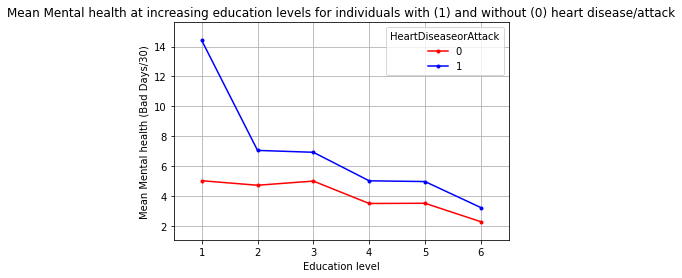

15
4
   group1  group2      Diff     Lower     Upper    q-value  p-value
0       0       1  1.640016  1.542013  1.738018  46.384996    0.001
0
    group1  group2      Diff     Lower      Upper    q-value   p-value
0   (0, 4)  (0, 6)  1.219678  1.092322   1.347034  44.262944  0.001000
1   (0, 4)  (0, 3)  1.500828  1.211031   1.790626  23.935918  0.001000
2   (0, 4)  (0, 5)  0.014023 -0.126080   0.154126   0.462598  0.900000
3   (0, 4)  (0, 2)  1.222313  0.789343   1.655283  13.047831  0.001000
4   (0, 4)  (0, 1)  1.524927 -0.474125   3.523979   3.525647  0.344969
..     ...     ...       ...       ...        ...        ...       ...
61  (1, 3)  (1, 2)  0.126001 -0.922826   1.174827   0.555243  0.900000
62  (1, 3)  (1, 1)  7.493521  2.989527  11.997515   7.689569  0.001000
63  (1, 5)  (1, 2)  2.087758  1.178700   2.996817  10.614570  0.001000
64  (1, 5)  (1, 1)  9.455279  4.981766  13.928792   9.768763  0.001000
65  (1, 2)  (1, 1)  7.367521  2.820915  11.914126   7.489417  0.001000

[66 

C:\Users\trist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Parameter,Value
0,Test statistics (W),621.6985
1,Degrees of freedom (Df),5.0000
2,p value,0.0000


<Figure size 432x288 with 0 Axes>

In [35]:
### Mental Health 
# Ordinary Least Squares (OLS) model - ANOVA 
model = ols('MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)',
            data=original_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# interaction plot 
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=original_df['Education'], trace=original_df['HeartDiseaseorAttack'],
                       response=original_df['MentHlth'], 
                        colors=['r','b'])
plt.title("Mean Mental health at increasing education levels for individuals with (1) and without (0) heart disease/attack")
plt.xlabel("Education level")
plt.ylabel("Mean Mental health (Bad Days/30)")
plt.grid()
plt.show()
plt.savefig("Mentalhealth.png")
# there is a statistical difference but where - tukey

# Difference in mental health means based on education level
res = stat()
res.tukey_hsd(df=original_df, res_var='MentHlth', xfac_var='Education', anova_model='MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print(len(res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] > 0.05]
print(len(significant_differences))

# Difference in mental health means between individuals with heart disease and not
#tukey test
res.tukey_hsd(df=original_df, res_var='MentHlth', xfac_var='HeartDiseaseorAttack', anova_model='MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print((res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] > 0.05]
print(len(significant_differences))

### interaction 
res.tukey_hsd(df=original_df, res_var='MentHlth', xfac_var=['HeartDiseaseorAttack','Education'] , anova_model='MentHlth ~ C(Education) + C(HeartDiseaseorAttack) + C(Education):C(HeartDiseaseorAttack)')
print((res.tukey_summary))
significant_differences = res.tukey_summary[res.tukey_summary["p-value"] > 0.05]
print(len(significant_differences))


############ normality - shapiro wilks 
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

############ homogeniety of variance - levenes
res = stat()
res.levene(df=original_df, res_var='MentHlth', xfac_var='Education')
res.levene_summary

### Large data set normality and homogeniety tests not valid 